# GNN Explainer

This notebook is designed to visualize the results of the GNN Explainer.

In [1]:
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
import re
import pandas as pd

In [2]:
logdir = '../log/'

In [3]:
dirs = os.listdir(logdir)
dirs

['masked_adj_syn2_base_h20_o20_explainnode_idx_465graph_idx_-1.npy',
 'masked_adj_syn2_base_h20_o20_explainnode_idx_440graph_idx_-1.npy',
 'masked_adj_syn2_base_h20_o20_explainnode_idx_630graph_idx_-1.npy',
 'node_idx_new_map.csv',
 'masked_adj_syn2_base_h20_o20_explainnode_idx_655graph_idx_-1.npy',
 'masked_adj_syn2_base_h20_o20_explainnode_idx_500graph_idx_-1.npy',
 'masked_adj_syn2_base_h20_o20_explainnode_idx_595graph_idx_-1.npy',
 'masked_adj_syn2_base_h20_o20_explainnode_idx_415graph_idx_-1.npy',
 'masked_adj_syn2_base_h20_o20_explainnode_idx_525graph_idx_-1.npy',
 'masked_adj_syn2_base_h20_o20_explainnode_idx_650graph_idx_-1.npy',
 'masked_adj_syn2_base_h20_o20_explainnode_idx_585graph_idx_-1.npy',
 'masked_adj_syn2_base_h20_o20_explainnode_idx_575graph_idx_-1.npy',
 'masked_adj_syn2_base_h20_o20_explainnode_idx_550graph_idx_-1.npy',
 'masked_adj_syn2_base_h20_o20_explainnode_idx_410graph_idx_-1.npy',
 'masked_adj_syn2_base_h20_o20_explainnode_idx_540graph_idx_-1.npy',
 'syn2_ba

In [4]:
node_idx_new_map = pd.read_csv("../log/node_idx_new_map.csv", header=None, index_col=0)
masks = []
mask_to_node_idx_new = {}
for file in dirs:
    if file.split('.')[-1] == 'npy':
        print(file)
        masks.append(file)
        node_idx = int(re.findall(r"explainnode_idx_(\d*)graph", file)[0])
        node_idx_new = node_idx_new_map.loc[node_idx].values[0]
        mask_to_node_idx_new[file] = node_idx_new

masked_adj_syn2_base_h20_o20_explainnode_idx_465graph_idx_-1.npy
masked_adj_syn2_base_h20_o20_explainnode_idx_440graph_idx_-1.npy
masked_adj_syn2_base_h20_o20_explainnode_idx_630graph_idx_-1.npy
masked_adj_syn2_base_h20_o20_explainnode_idx_655graph_idx_-1.npy
masked_adj_syn2_base_h20_o20_explainnode_idx_500graph_idx_-1.npy
masked_adj_syn2_base_h20_o20_explainnode_idx_595graph_idx_-1.npy
masked_adj_syn2_base_h20_o20_explainnode_idx_415graph_idx_-1.npy
masked_adj_syn2_base_h20_o20_explainnode_idx_525graph_idx_-1.npy
masked_adj_syn2_base_h20_o20_explainnode_idx_650graph_idx_-1.npy
masked_adj_syn2_base_h20_o20_explainnode_idx_585graph_idx_-1.npy
masked_adj_syn2_base_h20_o20_explainnode_idx_575graph_idx_-1.npy
masked_adj_syn2_base_h20_o20_explainnode_idx_550graph_idx_-1.npy
masked_adj_syn2_base_h20_o20_explainnode_idx_410graph_idx_-1.npy
masked_adj_syn2_base_h20_o20_explainnode_idx_540graph_idx_-1.npy
masked_adj_syn2_base_h20_o20_explainnode_idx_640graph_idx_-1.npy
masked_adj_syn2_base_h20_

In [5]:
def show_adjacency_full(mask, ax=None):
    adj = np.load(os.path.join(logdir, mask), allow_pickle=True)
    if ax is None:
        plt.figure()
        plt.imshow(adj);
    else:
        ax.imshow(adj)
    return adj

In [6]:
def filter_adj(adj):
    filt_adj = adj.copy()
    filt_adj[adj<0.8] = 0
    return filt_adj

/home/lucasresck/anaconda3/envs/gnn-model-explainer/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


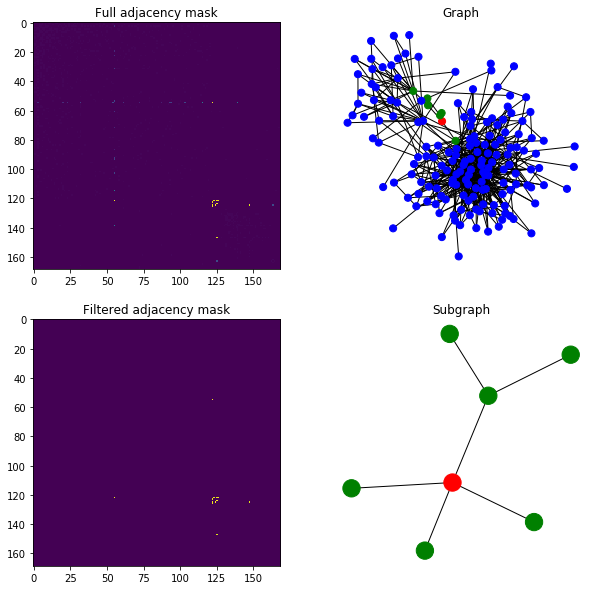

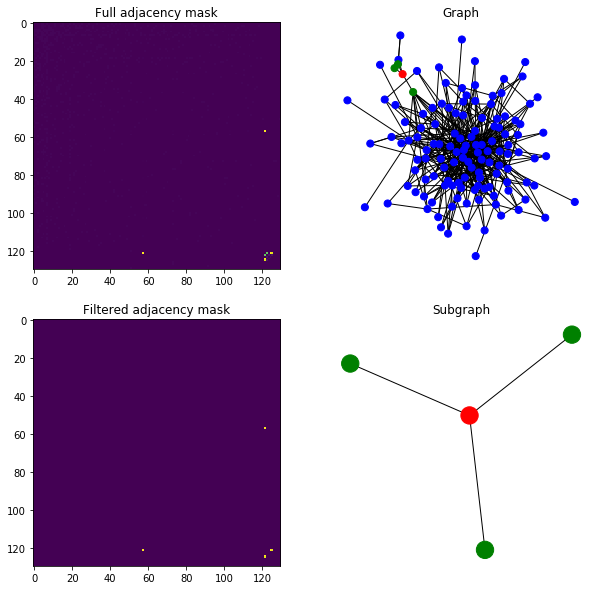

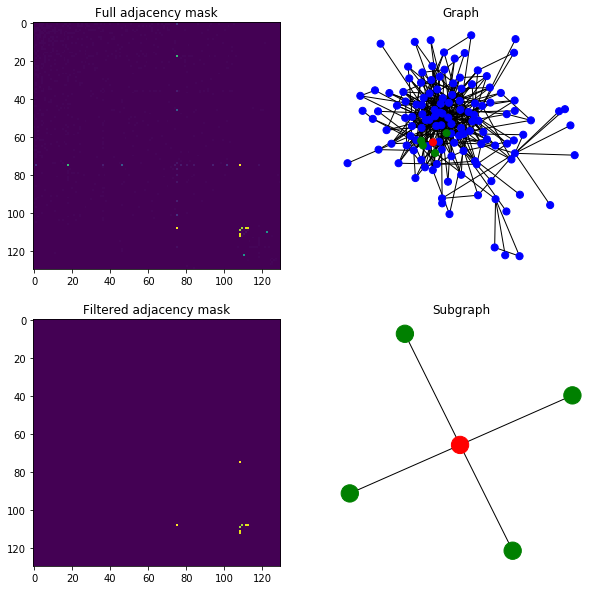

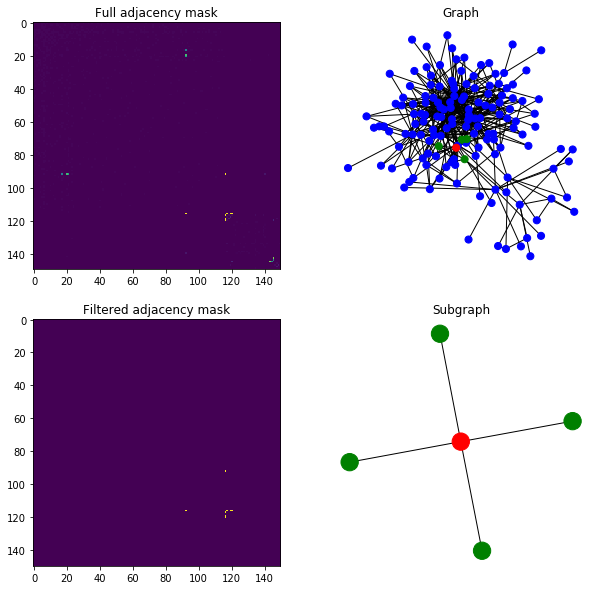

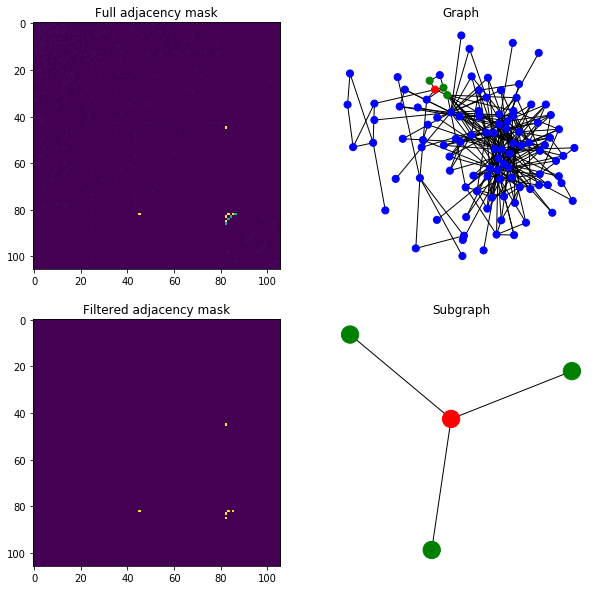

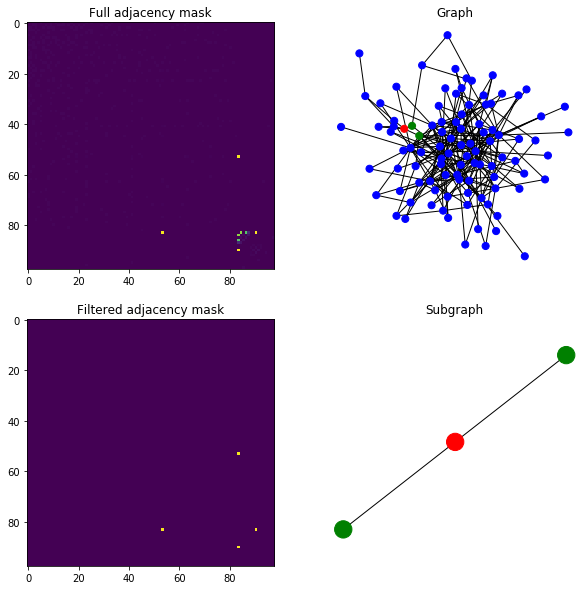

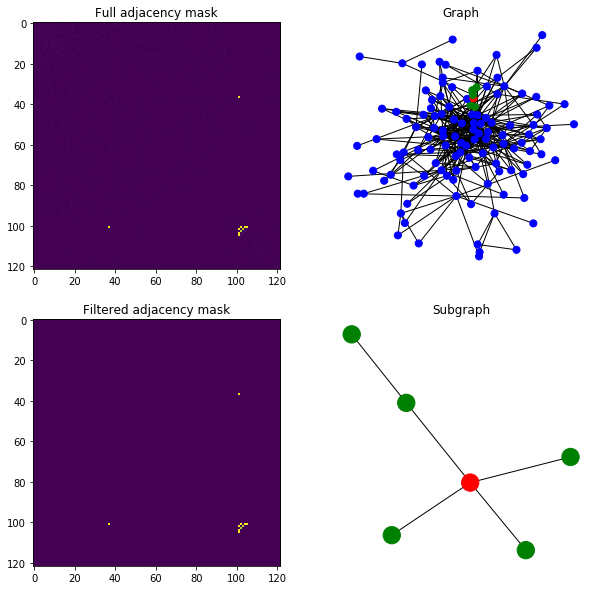

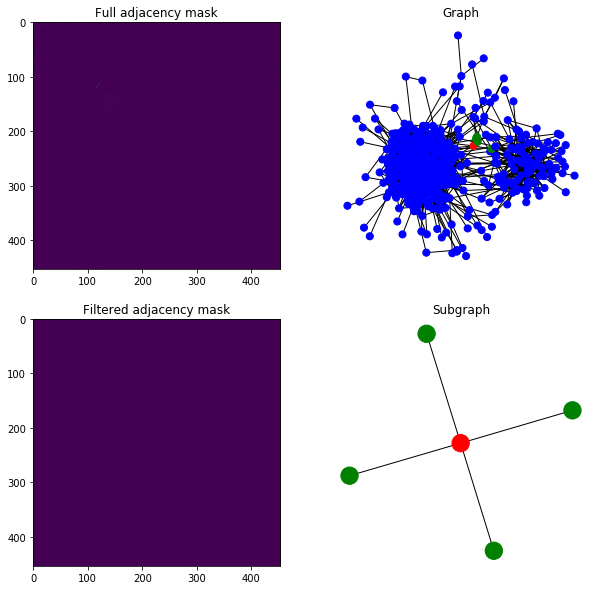

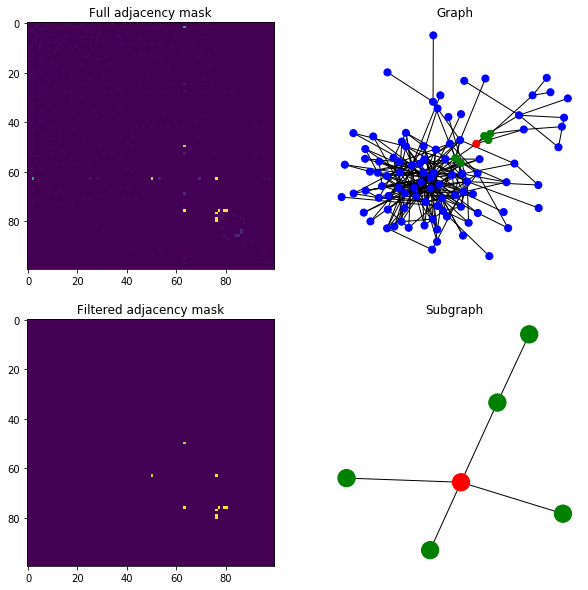

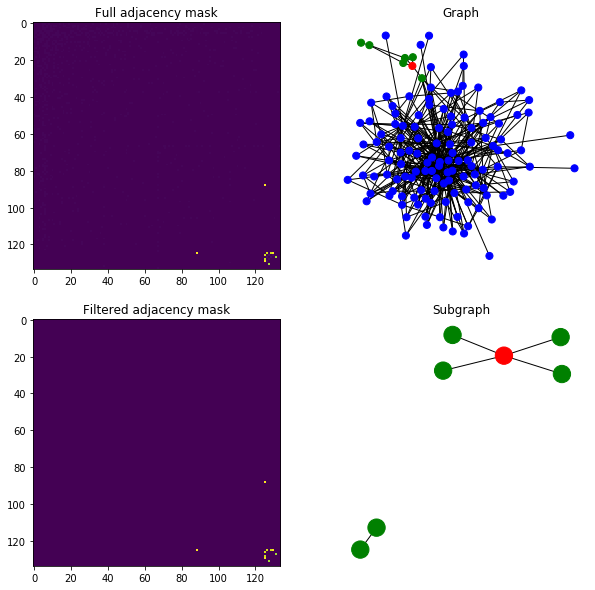

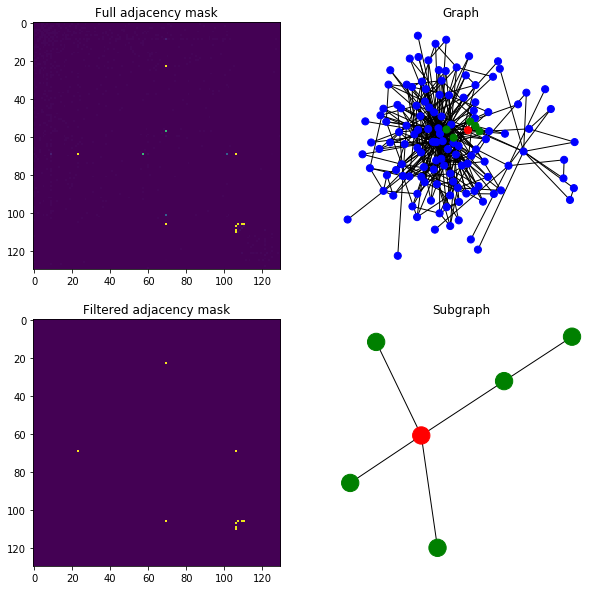

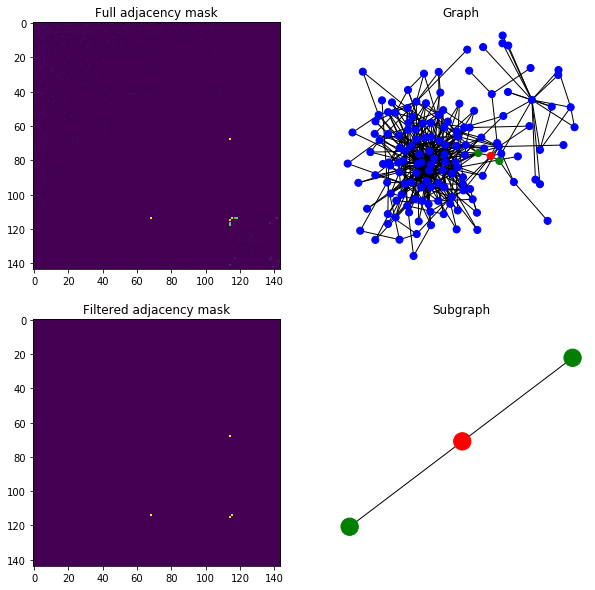

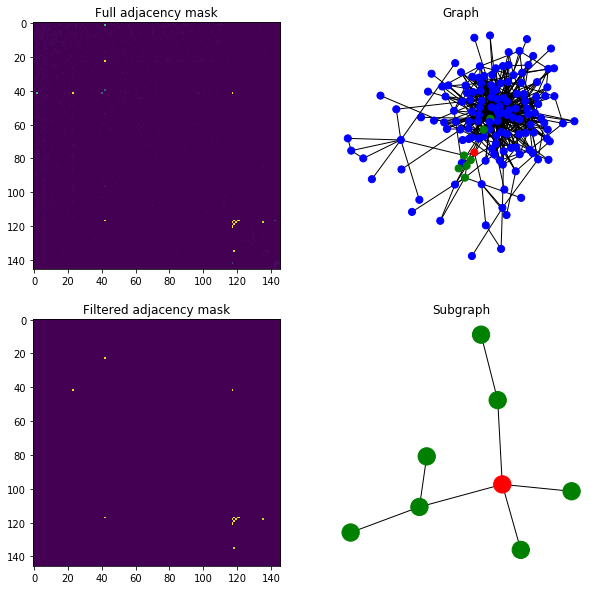

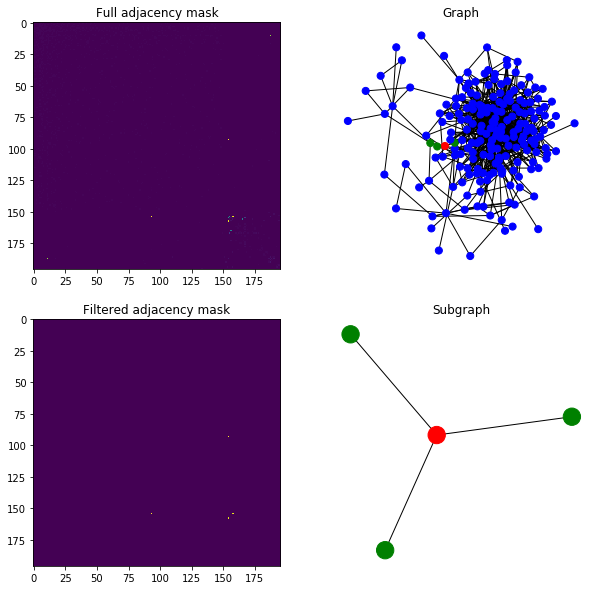

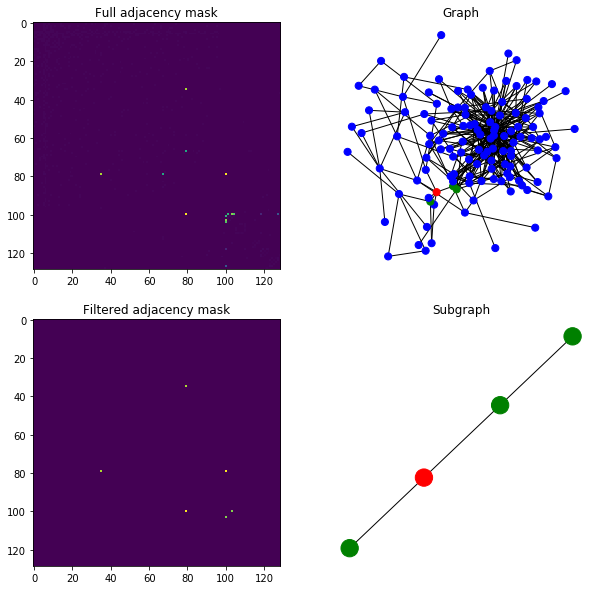

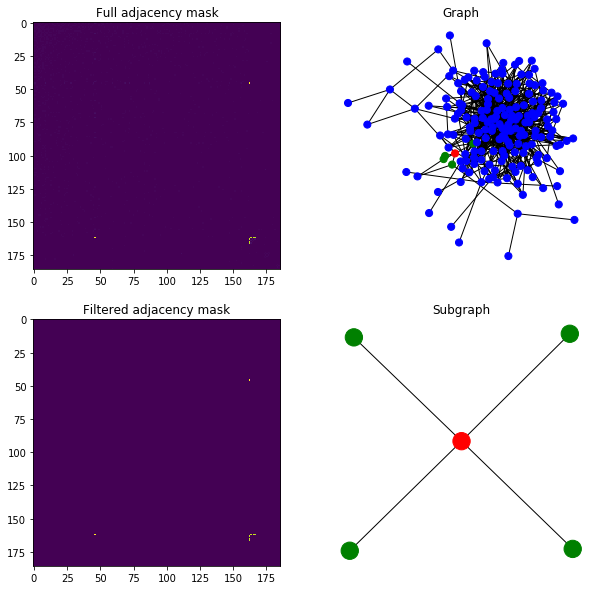

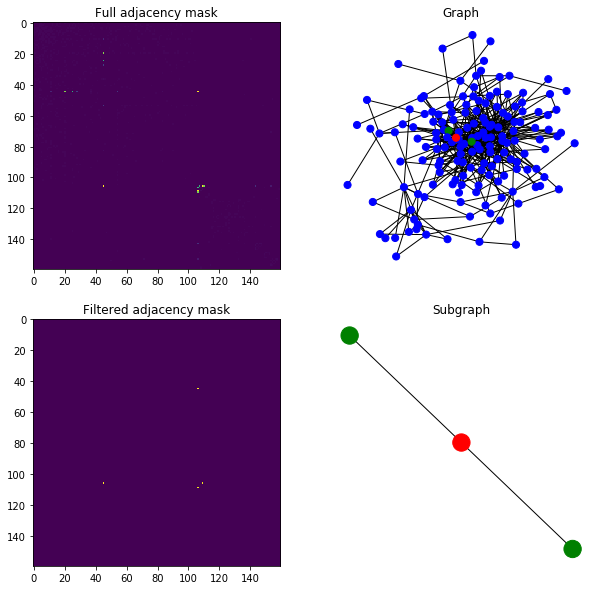

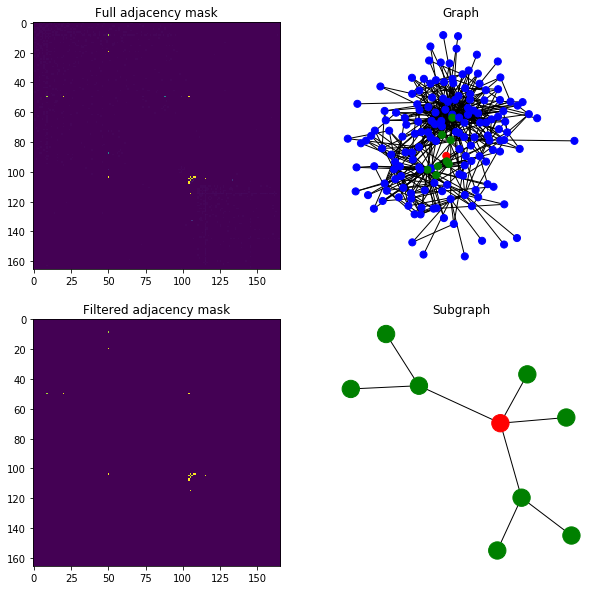

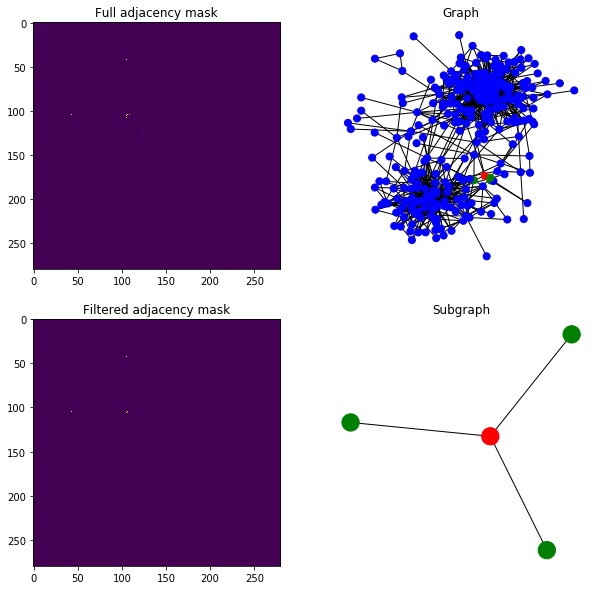

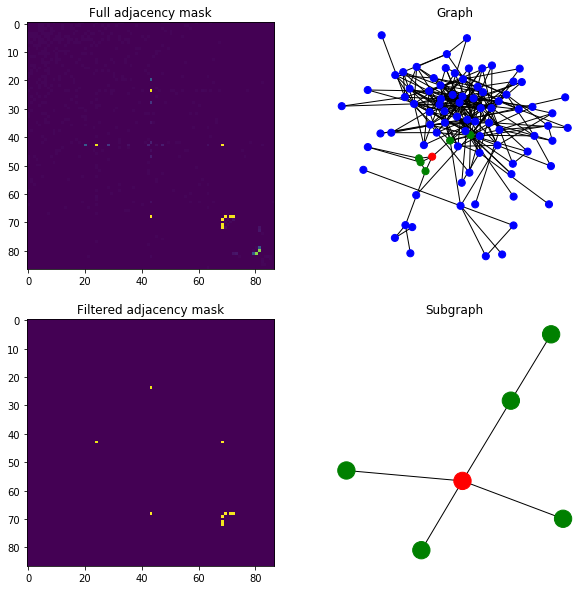

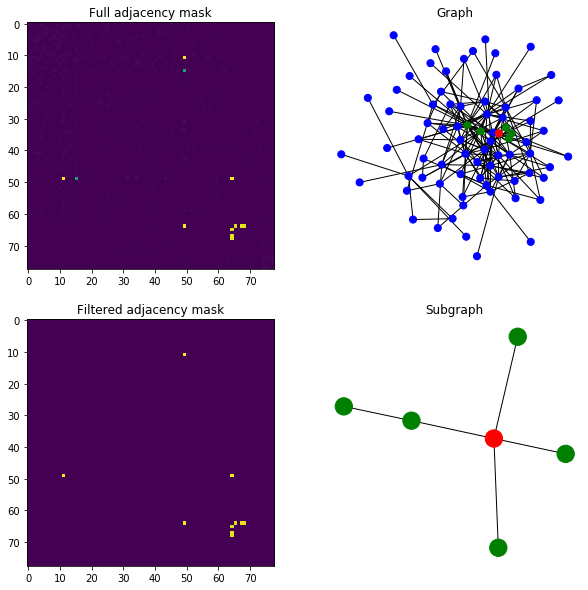

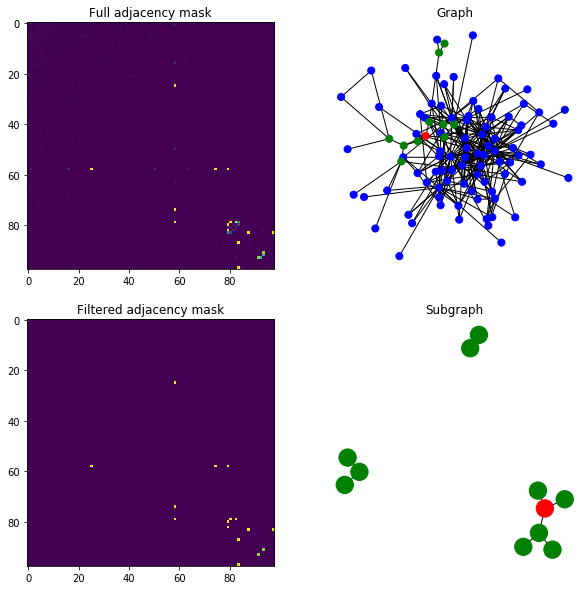

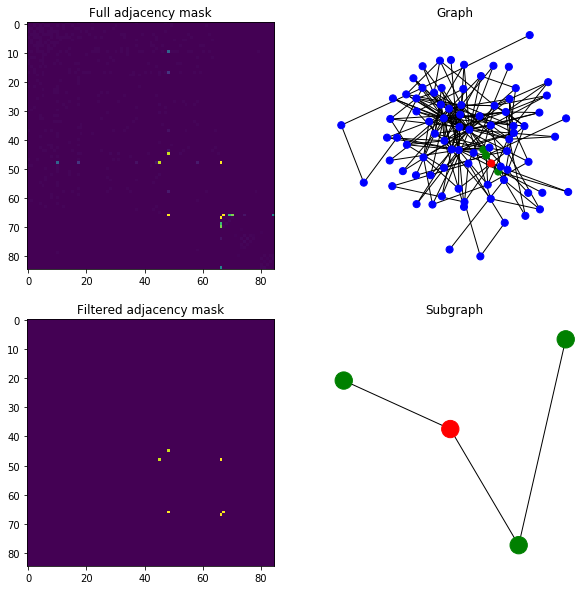

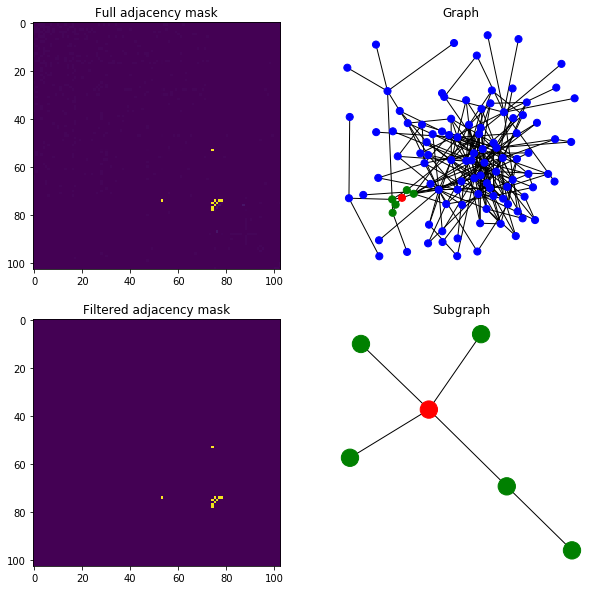

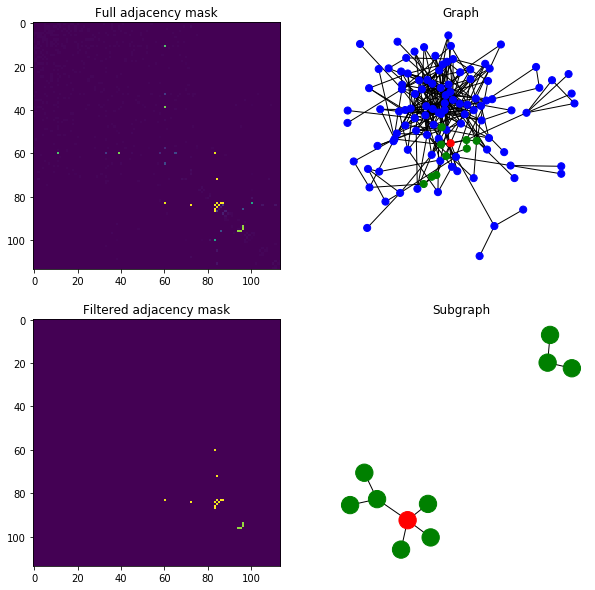

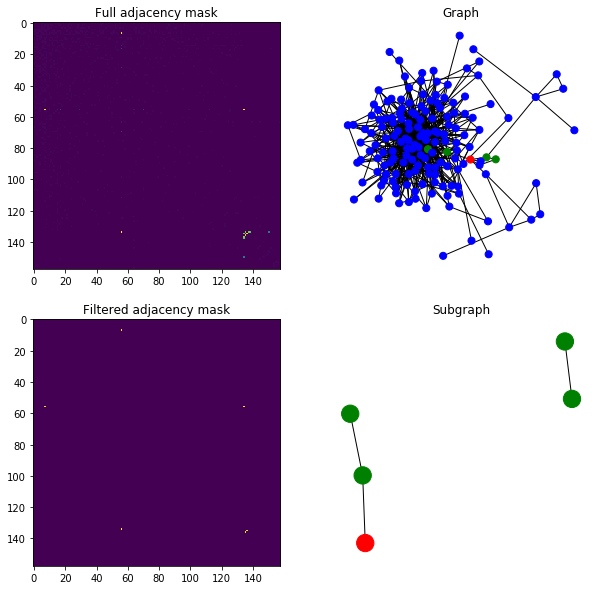

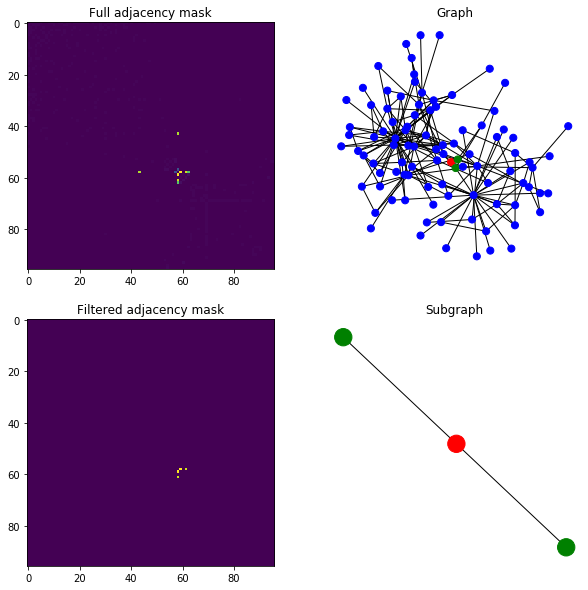

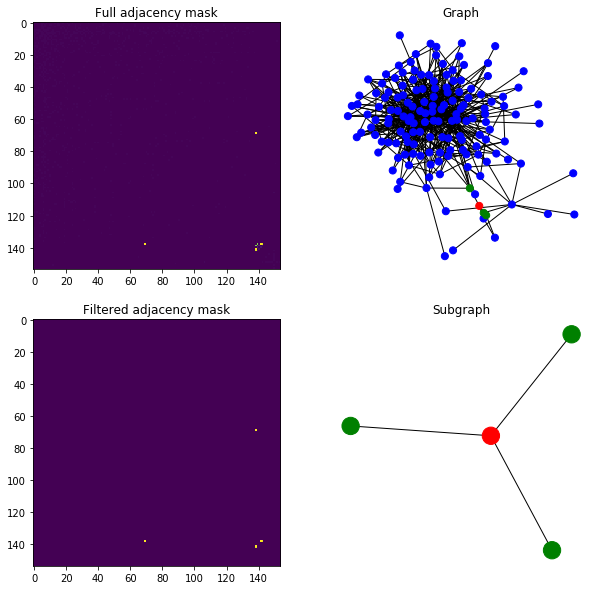

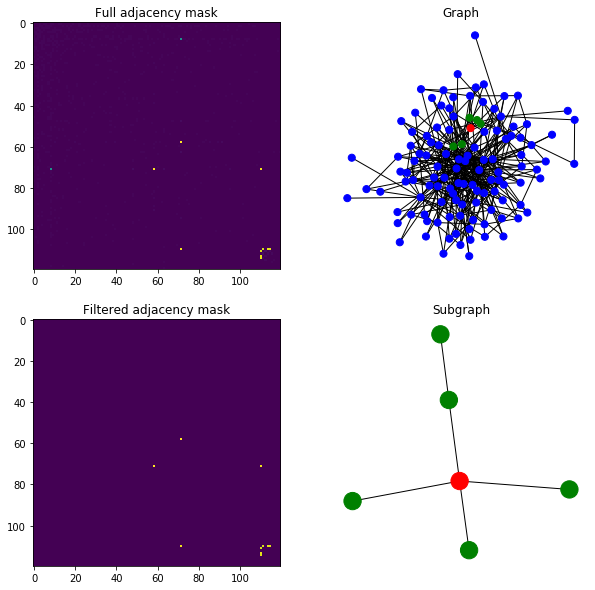

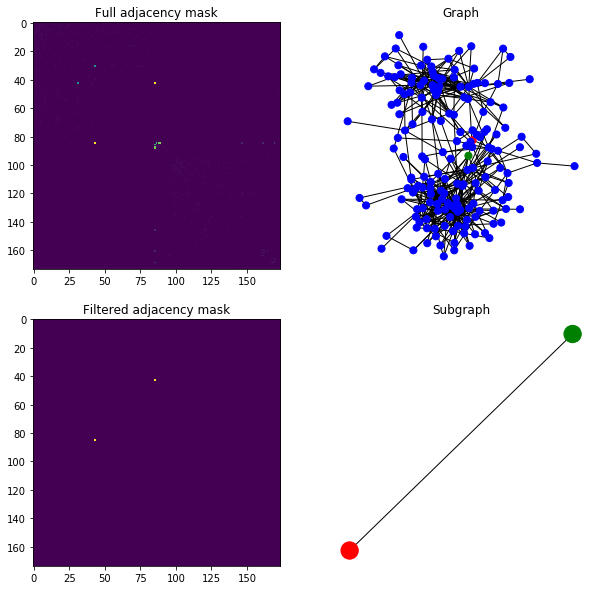

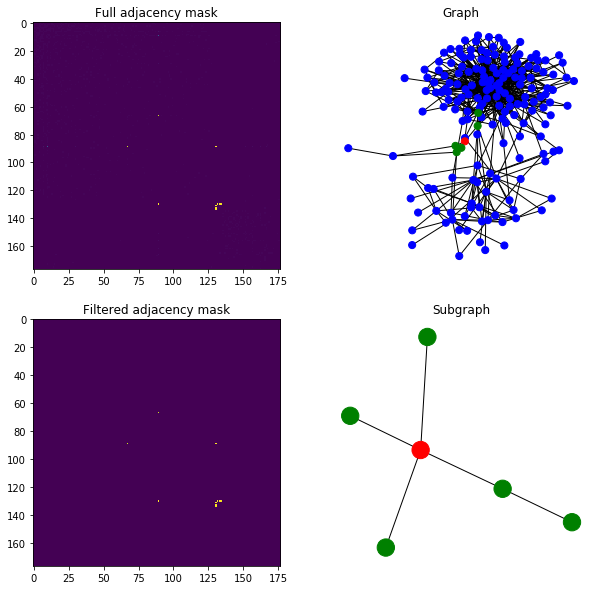

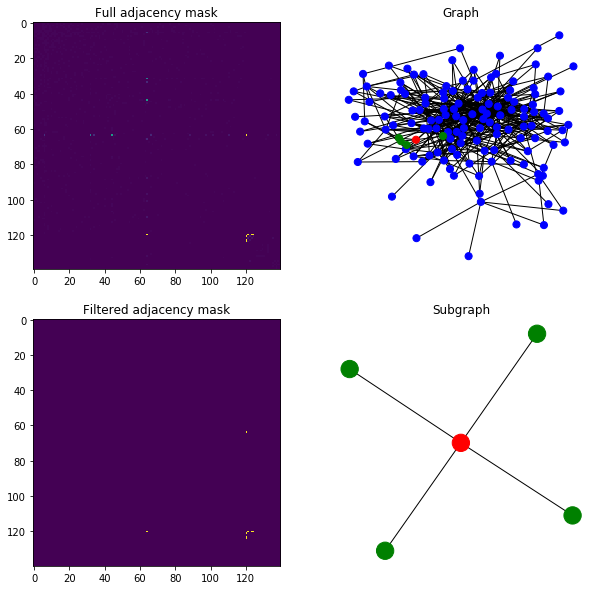

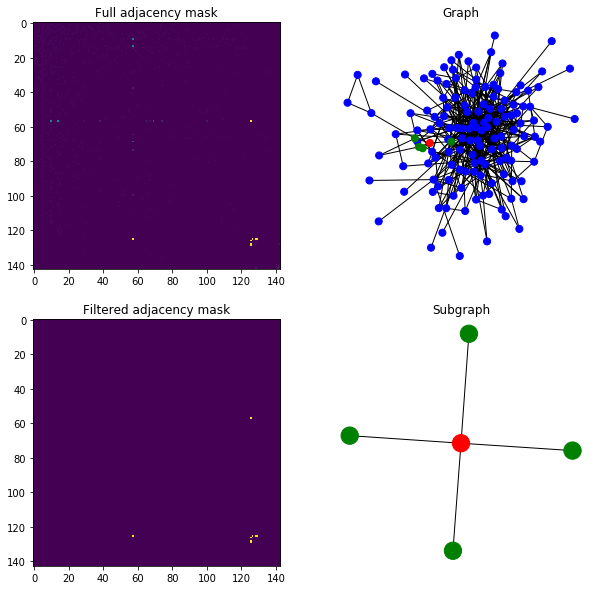

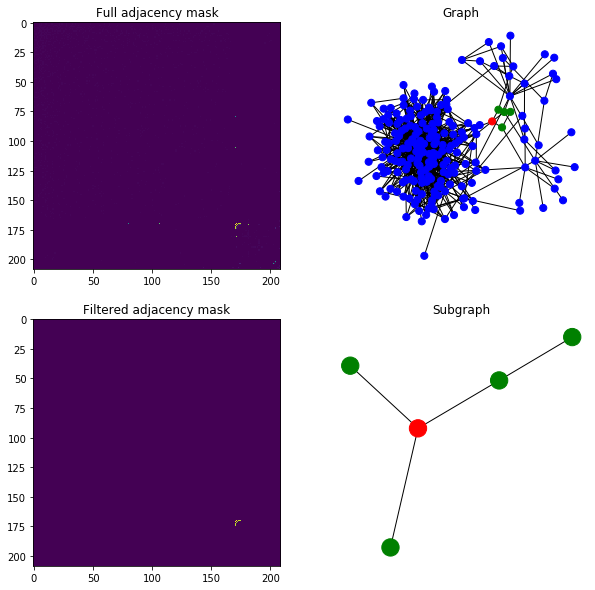

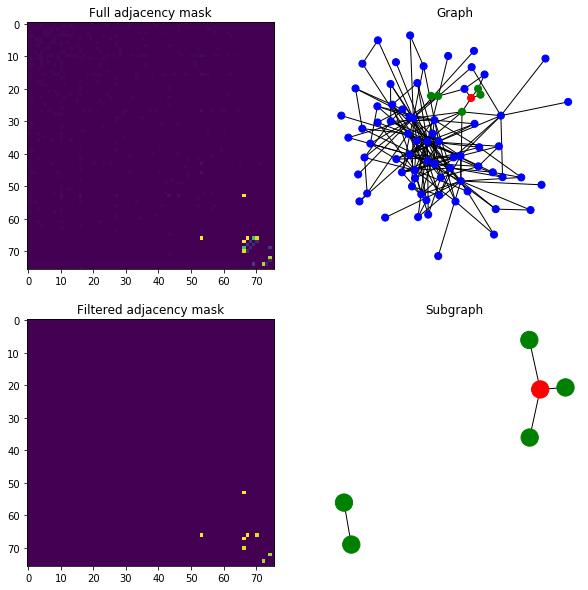

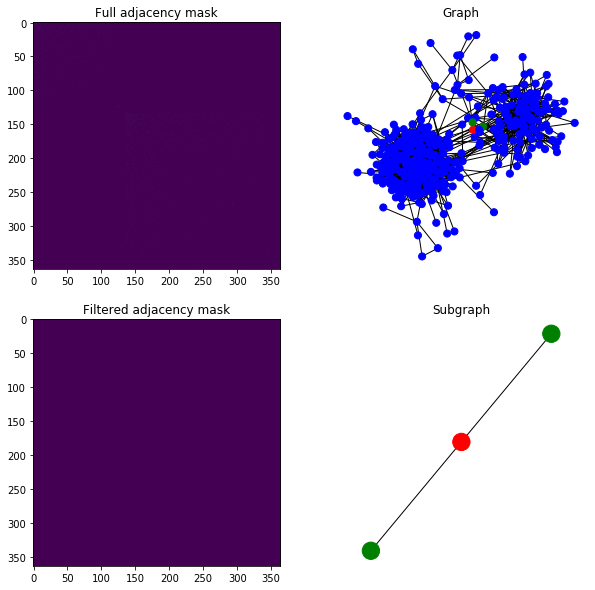

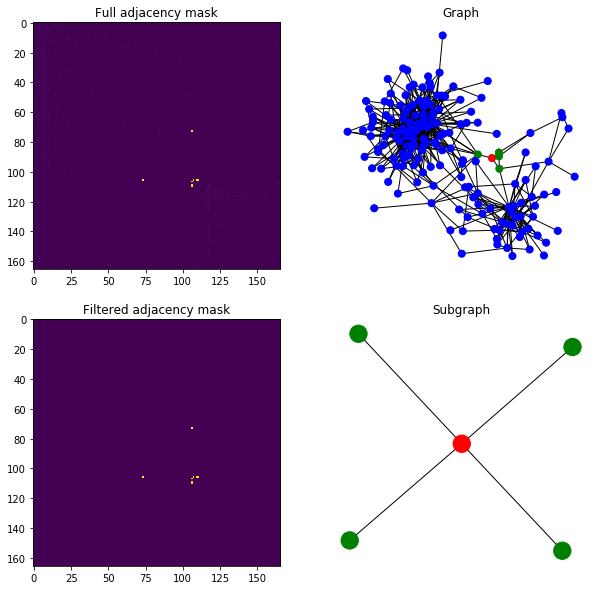

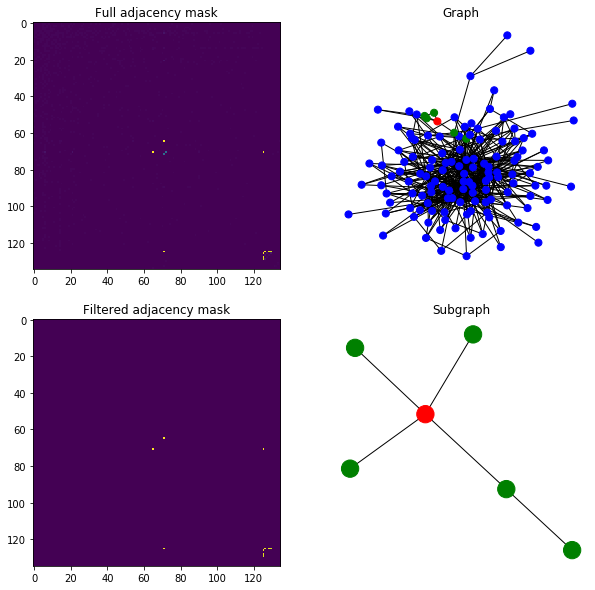

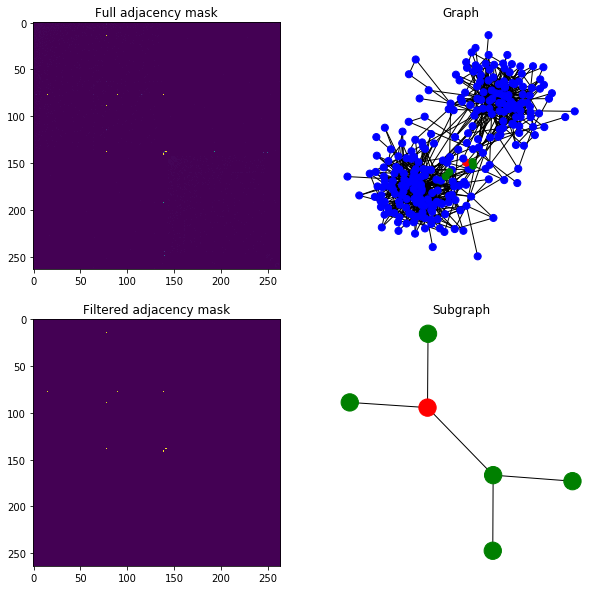

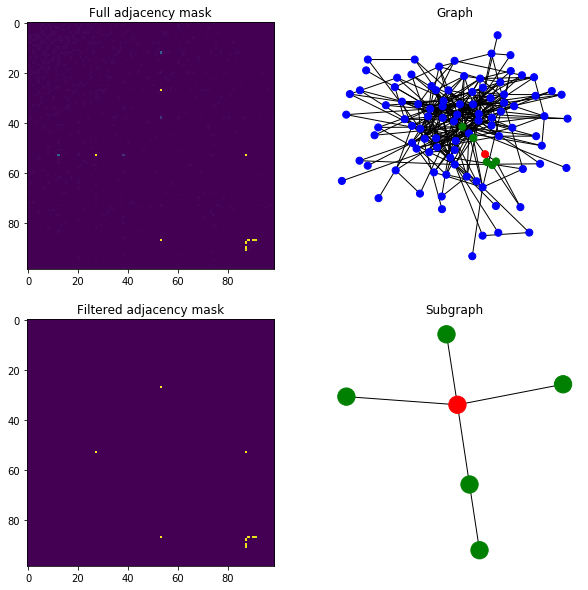

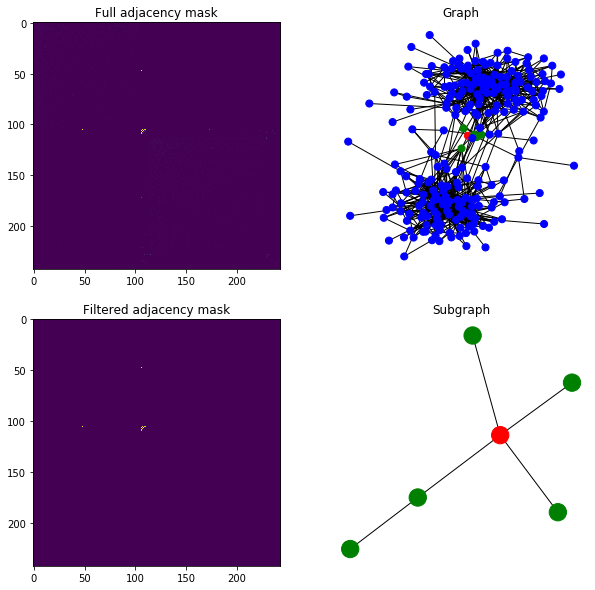

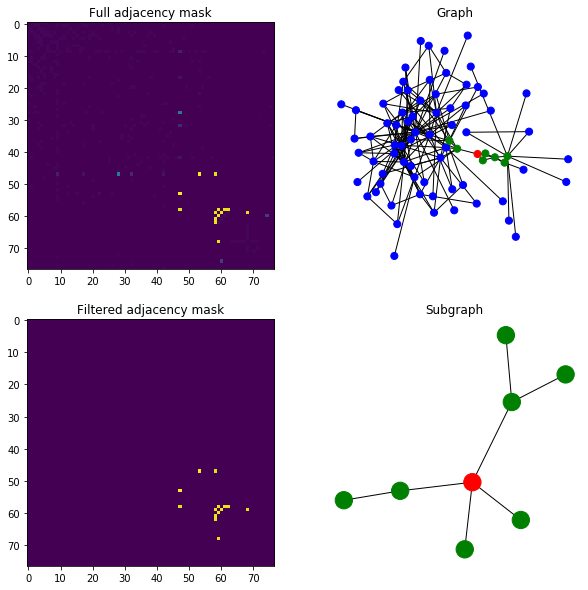

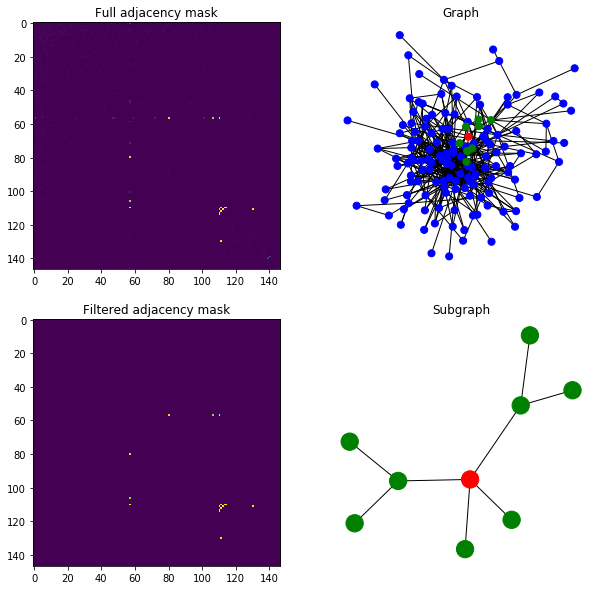

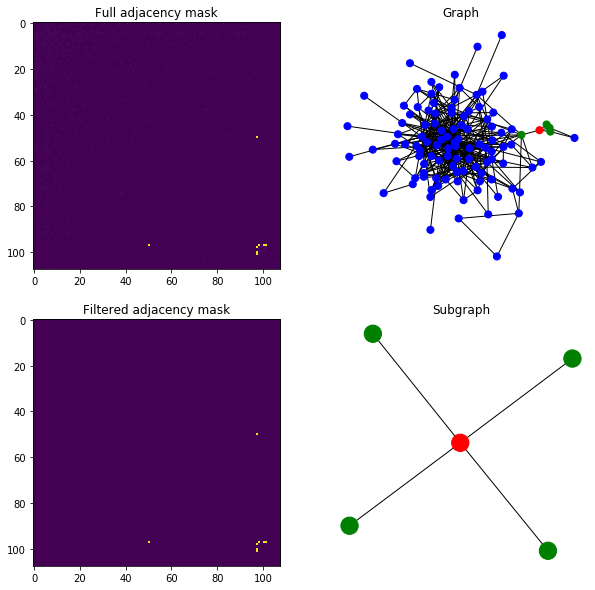

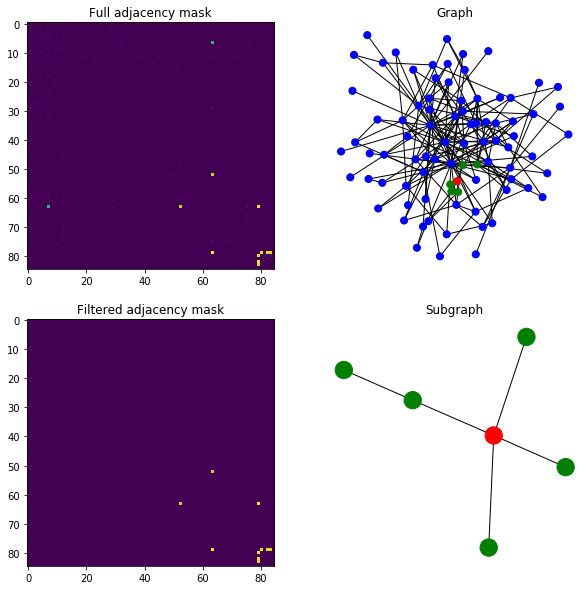

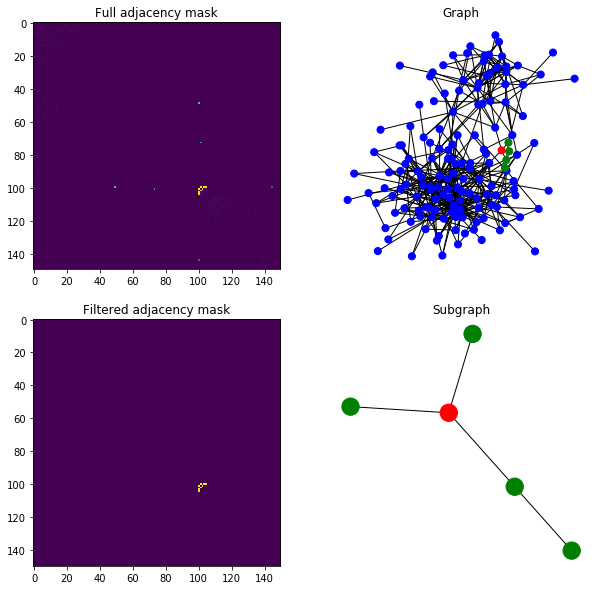

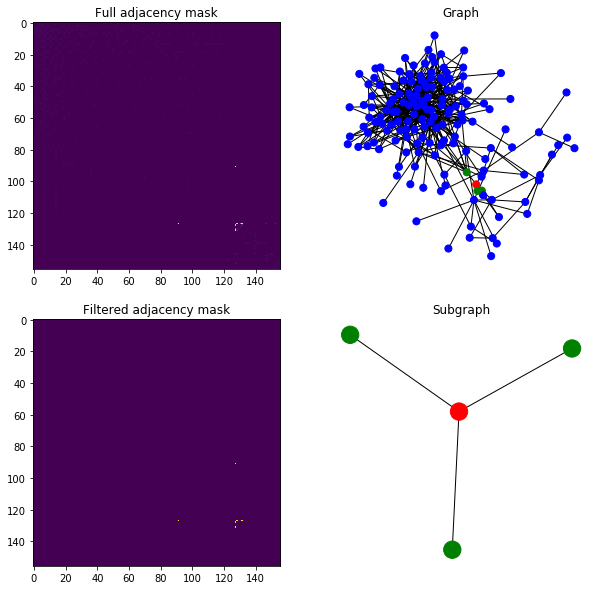

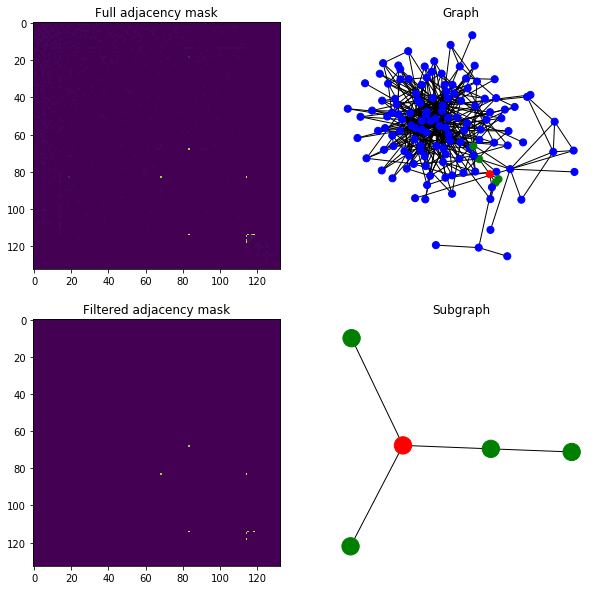

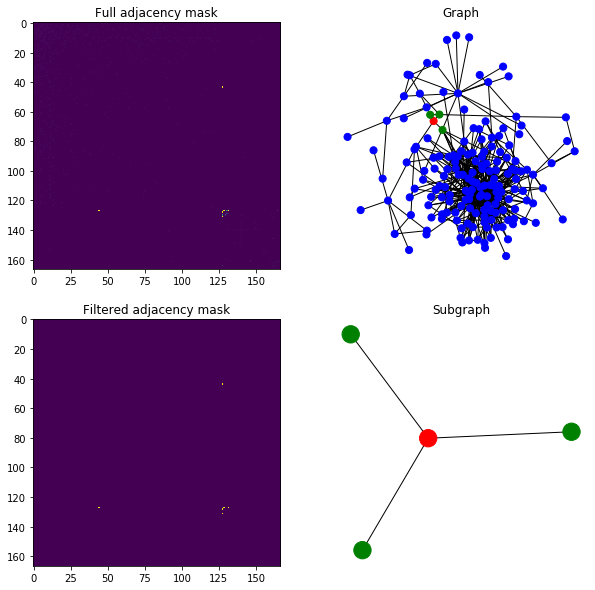

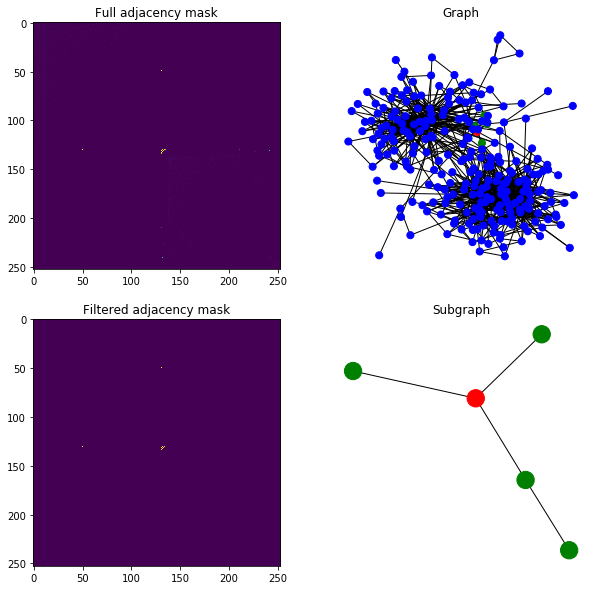

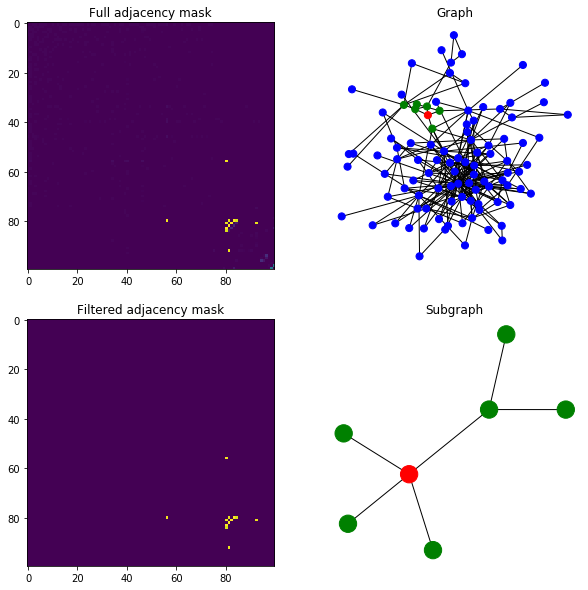

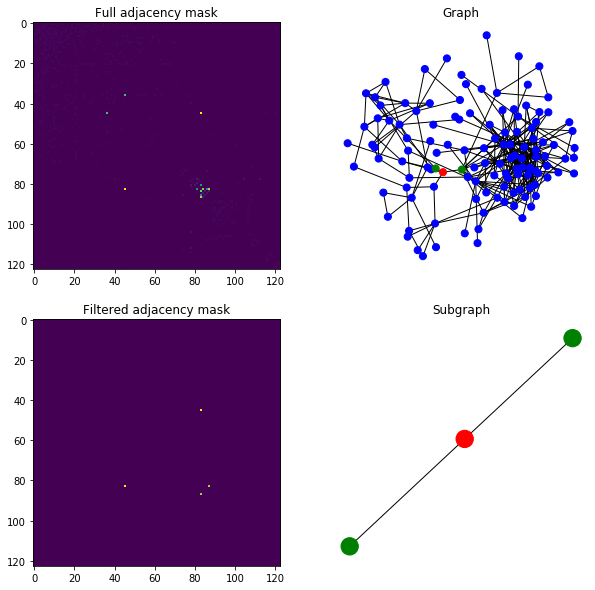

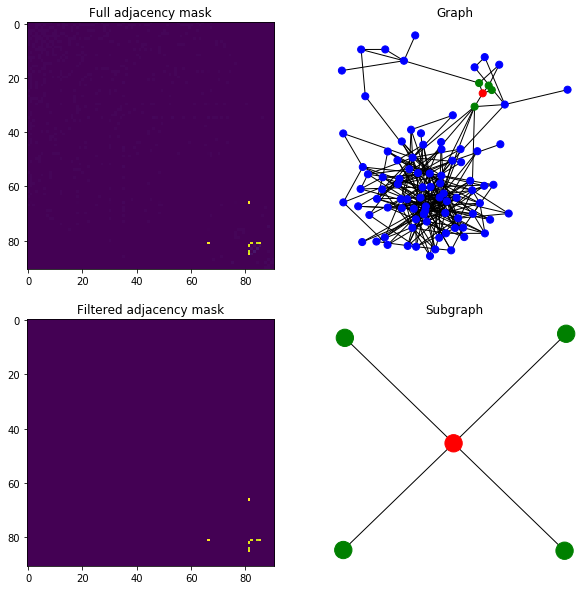

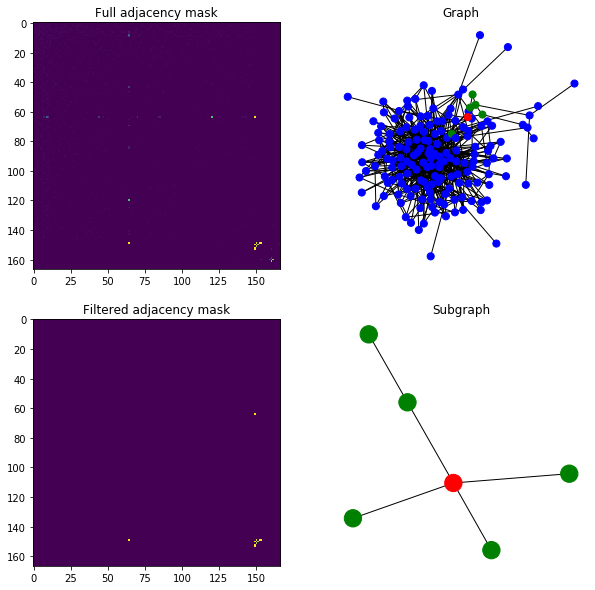

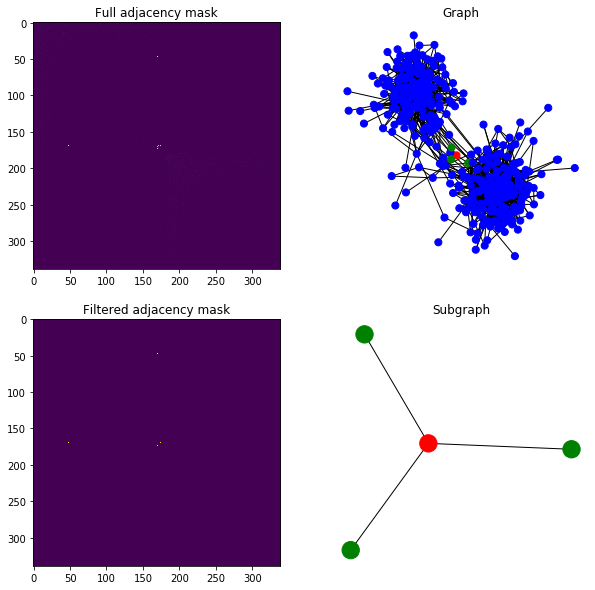

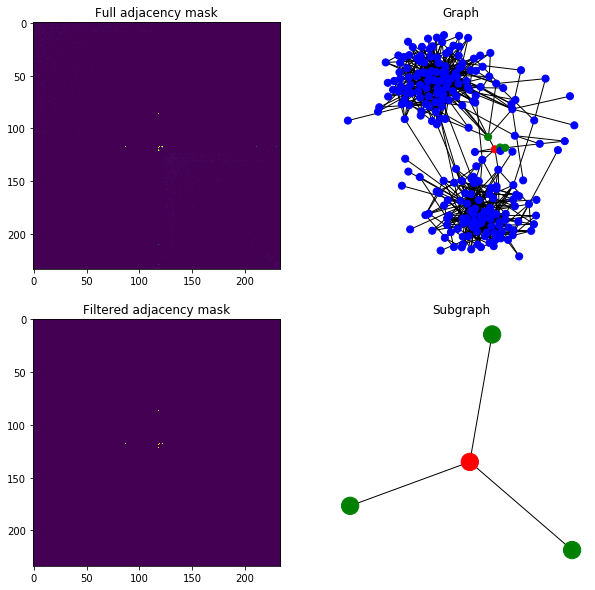

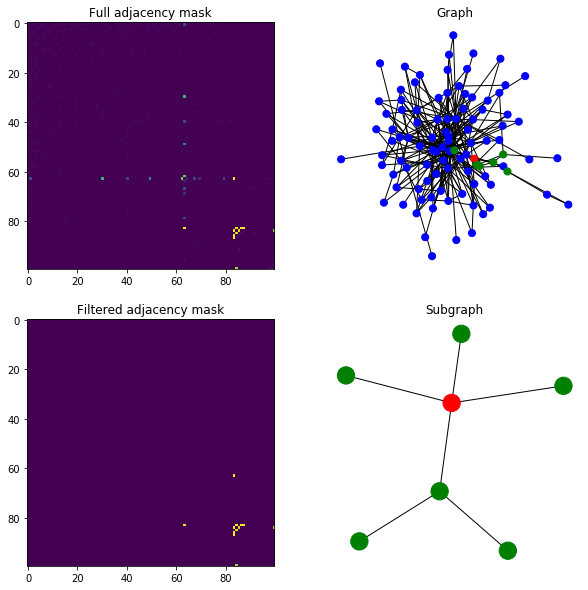

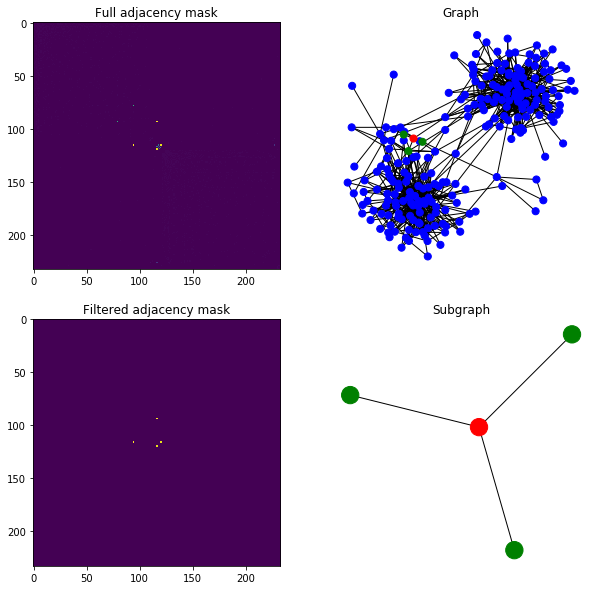

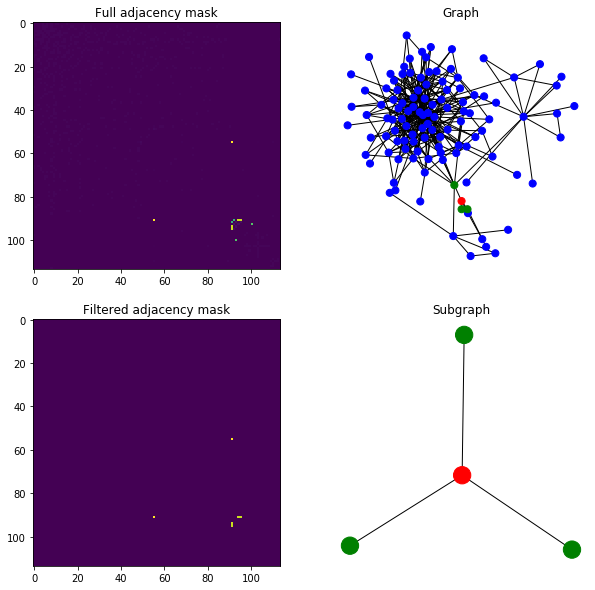

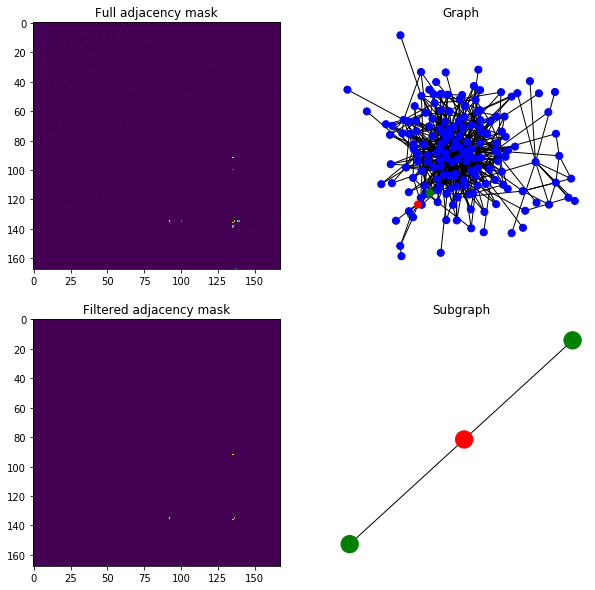

In [7]:
for m in masks: 

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    ax1, ax2, ax3, ax4 = axes.flatten()
    
    # Full adjacency
    ax1.set_title('Full adjacency mask')
    adj = show_adjacency_full(m, ax=ax1)
    G = nx.from_numpy_array(adj)
    f = filter_adj(adj)
    H = nx.from_numpy_array(f)
    H.remove_nodes_from(list(nx.isolates(H)))

    # Plot graph
    ax2.set_title('Graph')
    color_map = []
    for node in G:
        if node == mask_to_node_idx_new[m]:
            color_map.append('red')
        elif node in H:
            color_map.append('green')
        else: 
            color_map.append('blue')
    nx.draw(G, ax=ax2, node_color=color_map, node_size=50)
    
    # Filtered adjacency
    ax3.set_title('Filtered adjacency mask')
    ax3.imshow(f)
    
    # Plot subgraph
    ax4.set_title("Subgraph")
    color_map = []
    for node in H:
        if node == mask_to_node_idx_new[m]:
            color_map.append('red')
        else: 
            color_map.append('green')
    nx.draw(H, ax=ax4, node_color=color_map)